# CNN을 이용한 손글씨 숫자 예측

## 0. 라이브러리

In [1]:
import numpy as np

from keras.datasets.mnist import load_data

import matplotlib.pyplot as plt

import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
from torch import optim

## 1. 데이터

### 1) 다운로드/로드

In [51]:
(x_train, y_train), (x_test, y_test) = load_data()

In [52]:
print('train data shpae:', x_train.shape, y_train.shape)
print('test data shpae:', x_test.shape, y_test.shape)

train data shpae: (60000, 28, 28) (60000,)
test data shpae: (10000, 28, 28) (10000,)


### 2) 탐색

In [53]:
x_train[0] # 픽셀 단위의 숫자(0~255, 숫자가 클수록 검은색)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [54]:
x_train.shape # (data 개수, 가로 픽셀 수, 세로 픽셀 수)

(60000, 28, 28)

In [55]:
y_train[0] # label

np.uint8(5)

label: 1


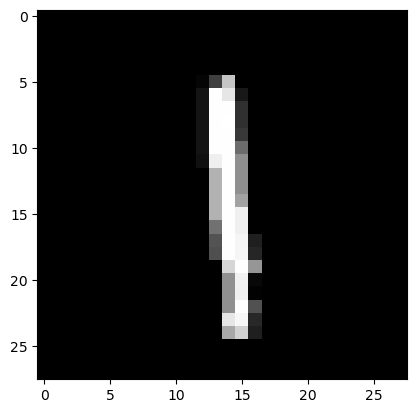

In [56]:
# data 예시
index = 8

print('label:', y_train[index])
plt.imshow(x_train[index], cmap='gray')

### 3) 전처리

* Tensor 변환
* 차원 추가
* 정규화

In [ ]:
# Tensor 변환
x_train = torch.Tensor(x_train)
y_train = torch.from_numpy(y_train).long() # 새로운 메모리를 할당하지 않음 -> 더 효율적
# y_train = torch.tensor(y_train.tolist(), dtype=torch.long)

x_test = torch.Tensor(x_test)
y_test = torch.from_numpy(y_test).long()

In [59]:
# 차원 추가 (CNN의 input data shape: [batch_size, channel, height, width])
print('Shape before change')
print(x_train.shape)
print(x_test.shape)

x_train = x_train.unsqueeze(1) # 1번째 인덱스(channel)에 차원 추가
x_test = x_test.unsqueeze(1)

print('\nShape after change')
print(x_train.shape)
print(x_test.shape)

Shape before change
torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])

Shape after change
torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


In [60]:
# 정규화 -> 0~255 사이의 숫자값이므로 255로 나눔 (0~1 범위로 변환)
print('x_train[0]:')
print(x_train[0])

x_train[0]:
tensor([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0., 

In [61]:
x_train /= 255
x_test /= 255

print('normalized x_train[0]:')
print(x_train[0])

normalized x_train[0]:
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 

## 2. 모델링

### 1) 데이터셋 로드

In [62]:
# TensorDataset()을 이용하여 trainset, testset 생성
trainset = TensorDataset(x_train, y_train)
testset = TensorDataset(x_test, y_test)

# DataLoader를 이용하여 trainloader, testloader 생성 (batch size=16으로 설정)
trainloader = DataLoader(trainset, batch_size=16, shuffle=True)
testloader = DataLoader(testset, batch_size=16, shuffle=False)

### 2) 모델 설계

In [63]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1)  # 1 → 8 채널
        self.bn1 = nn.BatchNorm2d(8)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)  # 8 → 16 채널
        self.bn2 = nn.BatchNorm2d(16)
        self.adaptive_pool = nn.AdaptiveAvgPool2d(5)  # output을 5x5로 고정
        
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(16 * 5 * 5, 10)  # Fully Connected Layer
        self.relu = nn.ReLU()

    def forward(self, x):
        output = self.conv1(x)
        output = self.bn1(output)
        output = self.relu(output)
        output = self.pool(output)

        output = self.conv2(output)
        output = self.bn2(output)
        output = self.relu(output)
        output = self.adaptive_pool(output)
        
        output = self.flatten(output)
        output = self.fc(output)
        return output

### 3) 모델 학습

In [64]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [65]:
model = CNN().to(device)
criterion = nn.CrossEntropyLoss() # 손실 함수 (다중 분류)
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [66]:
num_epoch = 100

for epoch in range(num_epoch):
    total_loss = 0
    correct = 0
    total_samples = 0

    model.train()
    for batch in trainloader:
        input, label = batch
        input = input.to(device)
        label = label.to(device)

        output = model(input) # model의 예측값
        loss = criterion(output, label) # 손실 계산

        optimizer.zero_grad() # 기울기 초기화
        loss.backward() # 역전파
        optimizer.step() # 가중치 없데이트

        predicted = torch.argmax(output, dim=1)
        correct += (predicted==label).sum().item()
        total_samples += label.size(0)

    average_loss = total_loss/len(trainloader)  # 손실 평균
    accuracy = correct/total_samples  # 정확도 계산

    if epoch%10==0:
        print(f'epoch: {epoch+1} || loss: {average_loss:.4f} || accuracy: {accuracy:.4f}')

epoch: 1 || loss: 0.0000 || accuracy: 0.7436
epoch: 11 || loss: 0.0000 || accuracy: 0.9642
epoch: 21 || loss: 0.0000 || accuracy: 0.9742
epoch: 31 || loss: 0.0000 || accuracy: 0.9778
epoch: 41 || loss: 0.0000 || accuracy: 0.9807
epoch: 51 || loss: 0.0000 || accuracy: 0.9824
epoch: 61 || loss: 0.0000 || accuracy: 0.9842
epoch: 71 || loss: 0.0000 || accuracy: 0.9849
epoch: 81 || loss: 0.0000 || accuracy: 0.9856
epoch: 91 || loss: 0.0000 || accuracy: 0.9865


### 4) 성능 평가

예측 결과: 5 || 실제 정답 : 5


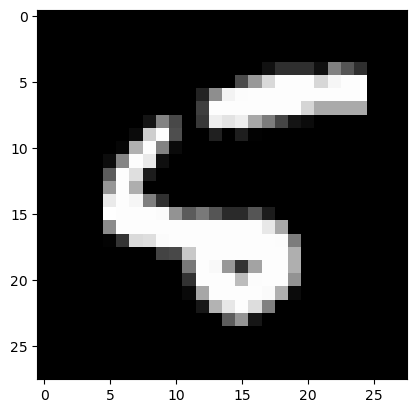

In [74]:
# 개별
index = 8

test_data = x_test[index].unsqueeze(1).to(device)
output = model(test_data)
predicted = torch.argmax(output.data)

print('예측 결과: {} || 실제 정답 : {}'.format(predicted, y_test[index]))
plt.imshow(x_test[index].reshape(28, 28).numpy(), cmap='gray')

In [69]:
# 전체
model.eval()

total_loss = 0
correct = 0
total_samples = len(testset)

with torch.no_grad(): # 기울기 계산 비활성화
    for batch in testloader:
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)  # 모델 예측
        loss = criterion(outputs, labels)  # 손실 계산
        total_loss += loss.item()  # 총 손실값 누적

        predicted = torch.argmax(outputs, dim=1)  # 가장 높은 확률을 가진 클래스 선택
        correct += (predicted==labels).sum().item()  # 맞힌 개수 누적

average_loss = total_loss/len(testloader) # 평균 손실
accuracy = correct/total_samples  # 정확도=맞힌 개수/전체 개수

print(f'Loss: {average_loss:.4f} || Accuracy: {accuracy:.4f}')

Loss: 0.0425 || Accuracy: 0.9863


In [70]:
model.train()  # 모델을 다시 학습 모드로 전환 (필수)

CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (adaptive_pool): AdaptiveAvgPool2d(output_size=5)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=400, out_features=10, bias=True)
  (relu): ReLU()
)